In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling
from bubbly.bubbly import bubbleplot
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

## Get data

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Explain the dataset

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing * probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)


# Some key information from the data

In [3]:
#profile = pandas_profiling.ProfileReport(dataset)
#profile

In [4]:

'''
figure = bubbleplot(dataset = dataset, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})
'''

'\nfigure = bubbleplot(dataset = dataset, x_column = \'trestbps\', y_column = \'chol\', \n    bubble_column = \'sex\', time_column = \'age\', size_column = \'oldpeak\', color_column = \'sex\', \n    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = \'BP vs Chol. vs Age vs Sex vs Heart Rate\',\n    x_logscale = False, scale_bubble = 3, height = 650)\n\npy.iplot(figure, config={\'scrollzoom\': True})\n'

In [5]:
# Divide the dataset with target and attribute
Y = dataset['target']
X = dataset.drop(['target'], axis = 1)
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


## Visualization

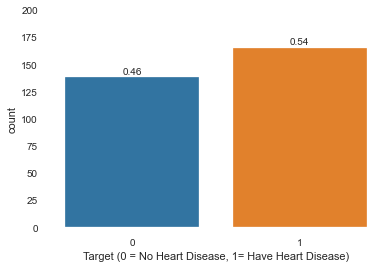

In [6]:
ax = sns.countplot(x="target", data=dataset)

total = len(dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
ax.set(ylim=(0,200))
plt.xlabel("Target (0 = No Heart Disease, 1= Have Heart Disease)")
plt.show()

## Normalization 

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)
print(X)

[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


## Machine Learning 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score)
model_lr = LogisticRegression().fit(X_train, y_train)
print(classification_report(y_test, model_lr.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8378    0.6739    0.7470        46
           1     0.7222    0.8667    0.7879        45

    accuracy                         0.7692        91
   macro avg     0.7800    0.7703    0.7674        91
weighted avg     0.7807    0.7692    0.7672        91



In [10]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC()
model_svc.fit(X_train, y_train)
print( classification_report(y_test, model_svc.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8857    0.6739    0.7654        46
           1     0.7321    0.9111    0.8119        45

    accuracy                         0.7912        91
   macro avg     0.8089    0.7925    0.7887        91
weighted avg     0.8098    0.7912    0.7884        91



In [11]:
X_train = X_train.T
y_train = y_train.T.to_numpy(dtype=int)
X_test = X_test.T
y_test = y_test.T.to_numpy(dtype=int)

print(type(y_test))

<class 'numpy.ndarray'>


In [12]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [13]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [14]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    print(y_head.shape)
    print(y_train.shape)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [15]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [16]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [17]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,X_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)

(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(1, 212)
(212,)
(

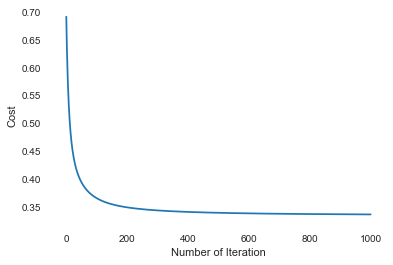

Manual Test Accuracy: 78.02%


In [18]:
logistic_regression(X_train,y_train,X_test,y_test,1,1000)

In [19]:
#save sklearn model

In [20]:
joblib.dump(model_lr,  "heart.pkl")

['heart.pkl']

In [21]:
lr = joblib.load("heart.pkl")

In [22]:
x_test = X_test.T
y_predict = lr.predict(x_test)

In [23]:
y_predict

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1])